In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths of the original folder and the destination folder
original_folder_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/'
destination_folder_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/AugDSImages/'

# Duplicate the folder and its contents
#shutil.copytree(original_folder_path, destination_folder_path)
shutil.copytree(original_folder_path, destination_folder_path, dirs_exist_ok=True)

# Confirming the duplication
print(f"Folder '{original_folder_path}' duplicated to '{destination_folder_path}'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/' duplicated to '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/AugDSImages/'


In [ ]:
import os

# Replace 'Your Folder Name' with the name of your folder.
root_folder = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/AugDSImages/'
#root_folder = 'content/MNIST Dataset JPG format/MNIST-JPG-training'
def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # You can extend this list if needed.
    total_image_count = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                total_image_count += 1

    return total_image_count

for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if os.path.isdir(folder_path):
        image_count = count_images_in_folder(folder_path)
        print(f"{folder_name}: {image_count} images")


0: 1184 images
1: 562 images
2: 825 images
3: 804 images
4: 1464 images
5: 208 images


In [ ]:
from PIL import Image
import os
import random

base_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/AugDSImages'

def augment_images(class_folder, target_images):
    class_path = os.path.join(base_path, class_folder)
    current_images = len(os.listdir(class_path))

    if current_images >= target_images:
        print(f"Class '{class_folder}' already has {current_images} images. Skipping augmentation.")
        return

    images_to_generate = target_images - current_images
    images = [os.path.join(class_path, img_file) for img_file in os.listdir(class_path)]

    while len(images) < images_to_generate:
        images += [os.path.join(class_path, img_file) for img_file in os.listdir(class_path)]

    for i in range(images_to_generate):
        img_path = images[i]
        img = Image.open(img_path)

        # Extract file name and extension from the original image
        file_name, file_extension = os.path.splitext(os.path.basename(img_path))

        # Generate a new name for the augmented image based on the existing naming convention
        new_name = f'{file_name}_A{i}{file_extension}'
        augmented_img_path = os.path.join(class_path, new_name)

        # Save augmented image with a new name and the same extension
        img.save(augmented_img_path)

# Target number of images per class after augmentation
target_images_per_class = 1500
class_folders = ['0', '1', '2', '3', '4', '5']

for folder in class_folders:
    augment_images(folder, target_images_per_class)


In [ ]:
import os

# Replace 'Your Folder Name' with the name of your folder.
root_folder = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/AugDSImages/'
#root_folder = 'content/MNIST Dataset JPG format/MNIST-JPG-training'
def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # You can extend this list if needed.
    total_image_count = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                total_image_count += 1

    return total_image_count

for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if os.path.isdir(folder_path):
        image_count = count_images_in_folder(folder_path)
        print(f"{folder_name}: {image_count} images")


0: 1500 images
1: 1500 images
2: 1500 images
3: 1500 images
4: 1500 images
5: 1500 images


In [ ]:
import os
import csv

from google.colab import drive
drive.mount('/content/drive')

# Path to the main dataset folder
#main_folder_path = '/content/drive/MyDrive/imgdataset'
#main_folder_path = '/content/drive/MyDrive/ColabNotebooks/MNIST_EXP/MNISTDatasetJPGformat/MNIST_NONIID'
main_folder_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/'

# List of folder names (labels)
folder_names = [str(i) for i in range(6)]

# Create or open the CSV file
csv_file_path = os.path.join(main_folder_path, 'image_labels.csv')
with open(csv_file_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['path', 'label'])

    # Traverse through each folder
    for label, folder_name in enumerate(folder_names):
        folder_path = os.path.join(main_folder_path, folder_name)

        # Get the list of image files in the folder
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Write relative image paths and labels to the CSV file
        for image_file in image_files:
            image_path = os.path.join(folder_name, image_file)
            csv_writer.writerow([image_path, label])

print(f'CSV file created at: {csv_file_path}')


Mounted at /content/drive
CSV file created at: /content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/image_labels.csv


In [ ]:
import os
from PIL import Image
import pandas as pd

dataset_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/'
csv_file_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/image_labels.csv'

df = pd.read_csv(csv_file_path)

# Batch size for processing images
batch_size = 50

# Create an empty DataFrame to store the final results
final_df = df.copy()

# Start and end indices for the current batch
start_index = 0
end_index = min(batch_size, len(df))

while start_index < len(df):
    current_batch = df.iloc[start_index:end_index]

    # Create empty lists to store pixel data
    pixel_data = []

    for index, row in current_batch.iterrows():
        image_path = os.path.join(dataset_path, row['path'])
        try:
            with Image.open(image_path).convert('L') as img:
                pixel_values = list(img.getdata())
                pixel_data.append(pixel_values)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    # Convert pixel data of the batch into a DataFrame
    pixel_df = pd.DataFrame(pixel_data)

    # Concatenate the pixel DataFrame to the final DataFrame
    final_df = pd.concat([final_df, pixel_df], axis=1)

    # Update indices for the next batch
    start_index = end_index
    end_index = min(end_index + batch_size, len(df))

# Optionally, you can drop the 'path' column if it's no longer needed
final_df.drop(columns=['path'], inplace=True)

# Optionally, you can set the 'class' column as index
# final_df.set_index('label', inplace=True)

# Now, final_df contains the pixel data as well as the original columns from your CSV


In [ ]:
import os
from PIL import Image
import pandas as pd

dataset_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/'
csv_file_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/image_labels.csv'

df = pd.read_csv(csv_file_path)

# Batch size for processing images
batch_size = 100

# Create an empty list to store all pixel data
all_pixel_data = []

for batch_start in range(0, len(df), batch_size):
    batch_df = df.iloc[batch_start:batch_start + batch_size]

    # Create an empty list to store pixel data for the current batch
    pixel_data = []

    for index, row in batch_df.iterrows():
        image_path = os.path.join(dataset_path, row['path'])
        try:
            with Image.open(image_path).convert('L') as img:
                pixel_values = list(img.getdata())
                pixel_data.append(pixel_values)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    # Convert pixel data of the batch into a DataFrame
    pixel_df = pd.DataFrame(pixel_data)

    # Combine the batch DataFrame with pixel data to the overall pixel data list
    all_pixel_data.extend(pixel_data)

# Convert accumulated pixel data into a DataFrame
all_pixel_df = pd.DataFrame(all_pixel_data)

# Concatenate the original DataFrame with the pixel DataFrame
final_df = pd.concat([df, all_pixel_df], axis=1)

# Optionally, you can drop the 'path' column if it's no longer needed
final_df.drop(columns=['path'], inplace=True)

# Optionally, you can set the 'class' column as index
# final_df.set_index('label', inplace=True)

# Now, final_df contains the pixel data as well as the original columns from your CSV


In [ ]:
import os
from PIL import Image
import pandas as pd

dataset_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/'
csv_file_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/image_labels.csv'

df = pd.read_csv(csv_file_path)

# Create an empty list to store pixel data
pixel_data = []

batch_size = 100  # Process images in batches of 100 (you can adjust this number)

for index, row in df.iterrows():
    image_path = os.path.join(dataset_path, row['path'])
    try:
        with Image.open(image_path).convert('L') as img:
            pixel_values = list(img.getdata())
            pixel_data.append(pixel_values)
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

    # Process images in batches
    if len(pixel_data) >= batch_size:
        pixel_df = pd.DataFrame(pixel_data)
        final_df = pd.concat([df.iloc[:len(pixel_df)], pixel_df], axis=1)
        pixel_data = []  # Reset pixel_data for the next batch
        # Do something with final_df (save to file, analyze, etc.)


In [ ]:
import os
from PIL import Image
import pandas as pd

# Define the path to your dataset and CSV file
dataset_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/'
csv_file_path = '/content/drive/MyDrive/ColabNotebooks/Ketan_SCAimages_v12212023/DSImages/image_labels.csv'


# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Create an empty list to store pixel data
pixel_data = []

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Construct the full path to the image
    image_path = os.path.join(dataset_path, row['path'])

    # Open the image and convert it to grayscale
    with Image.open(image_path).convert('L') as img:
        # Convert the image to a flat list of pixel values
        pixel_values = list(img.getdata())
        # Append pixel data to the list
        pixel_data.append(pixel_values)

# Convert the pixel data list into a DataFrame
pixel_df = pd.DataFrame(pixel_data)

# Concatenate the original DataFrame with the pixel DataFrame
final_df = pd.concat([df, pixel_df], axis=1)

# Optionally, you can drop the 'path' column if it's no longer needed
final_df.drop(columns=['path'], inplace=True)

# Optionally, you can set the 'class' column as index
#final_df.set_index('label', inplace=True)

# Now, final_df contains the pixel data as well as the original columns from your CSV


In [ ]:
final_df

,path,label,0,1,2,3,4,5,6,7,...,239990,239991,239992,239993,239994,239995,239996,239997,239998,239999
0,0/N0687.JPG,0,121,118,114,110,107,104,99,96,...,50,45,47,50,45,44,50,46,41,47
1,0/N0688.JPG,0,82,82,84,86,87,88,89,89,...,31,31,29,29,29,28,28,27,27,27
2,0/N0689.JPG,0,132,128,119,112,110,109,100,89,...,31,31,33,33,33,33,33,33,33,33
3,0/N0690.JPG,0,113,109,107,108,109,111,119,127,...,38,41,36,37,36,35,34,36,40,43
4,0/N0692.JPG,0,66,66,66,66,66,66,66,66,...,62,62,66,67,68,70,72,75,76,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0/N0788.JPG,0,31,37,45,48,46,43,41,40,...,30,31,30,31,33,34,35,36,36,36
96,0/N0790.JPG,0,175,147,112,90,83,82,81,80,...,54,54,54,54,54,54,54,55,56,57
97,0/N0789.JPG,0,233,236,240,243,245,247,250,251,...,48,47,50,49,47,44,42,41,40,40
98,0/N0791.JPG,0,28,28,27,26,26,25,24,24,...,50,50,36,39,43,48,49,49,46,45


In [ ]:
feature_names = [x for x in final_df.columns if x not in ['label']]

In [ ]:

# Get features
features = final_df.loc[:,final_df.columns.isin(feature_names)]

# Get labels
labels = list(final_df['label'])

In [ ]:
final_df['label'].unique()

array([0])

In [ ]:
!pip install fedartml
!pip install -q flwr[simulation]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.2/219.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from io import BytesIO
import requests

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam

import time
import pickle

import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid", rc = {'figure.figsize':(5,7)})

from sklearn.impute import SimpleImputer

import plotly.graph_objects as go


# Garbage Collector - use it like gc.collect()
import gc

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

from fedartml import InteractivePlots, SplitAsFederatedData

# Make TensorFlow logs less verbose
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import flwr as fl

from typing import List, Tuple, Dict, Optional
from flwr.common import Metrics

In [ ]:

# Define random state for reproducibility
random_state = 0

# Define colors to use in plots
colors = ["#00cfcc","#e6013b","#007f88","#00cccd","#69e0da","darkblue","#FFFFFF"]

# Define number of local nodes to be used
local_nodes_glob = 4

# Define percentage of noniid to be used
Percent_noniid = 5

In [ ]:
# Define function to test a model and retrieve classification metrics
def test_model(model, X_test, Y_test):
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
    logits = model.predict(X_test, batch_size=32, verbose=1, callbacks=[GarbageCollectorCallback()])
    y_pred = tf.argmax(logits, axis=1)
    loss = cce(Y_test, logits).numpy()
    acc = accuracy_score(y_pred, Y_test)
    pre = precision_score(y_pred, Y_test, average='weighted',zero_division = 0)
    rec = recall_score(y_pred, Y_test, average='weighted',zero_division = 0)
    f1s = f1_score(y_pred, Y_test, average='weighted',zero_division = 0)

    return loss, acc, pre, rec, f1s

# Define function to convert from SplitAsFederatedData function output (FedArtML) to Flower (list) format
def from_FedArtML_to_Flower_format(clients_dict):
  # initialize list that contains clients (features and labels) to extract later from client_fn in Flower
  list_x_train = []
  list_y_train = []

  # Get the name of the clients from the dictionary
  client_names = list(clients_dict.keys())

  # Iterate over each client
  for client in client_names:
    # Get data from each client
    each_client_train=np.array(clients_dict[client],dtype=object)

    # Extract features for each client
    feat=[]
    x_tra=np.array(each_client_train[:, 0])
    for row in x_tra:
      feat.append(row)
    feat=np.array(feat)

    # Extract labels from each client
    y_tra=np.array(each_client_train[:, 1])

    # Append in list features and labels to extract later from client_fn in Flower
    list_x_train.append(feat)
    list_y_train.append(y_tra)

  return list_x_train, list_y_train

# Define Deep Neural Network (DNN) model
def DNN(shape,classes):
  initializer = tf.keras.initializers.GlorotUniform(seed = random_state)

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(shape,), kernel_initializer=initializer),
    tf.keras.layers.Dense(500, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(500, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(classes, activation='softmax')
    ])

  return model


# Define local training/evaluation function
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, model, x_train, y_train, x_test, y_test, epochs_client) -> None:
        self.model = model
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        self.epochs_client = epochs_client

    def get_parameters(self, config):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        self.model.fit(self.x_train, self.y_train, validation_split=0.1, epochs=self.epochs_client, verbose=2)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        loss, acc = self.model.evaluate(self.x_test, self.y_test, verbose=2)
        return loss, len(self.x_test), {"accuracy": acc}

def plot_metric_from_history(
    hist: None,
    save_plot_path: None,
    metric_type: None,
    metric: None,
) -> None:
    """Function to plot from Flower server History.
    Parameters
    ----------
    hist : History
        Object containing evaluation for all rounds.
    save_plot_path : Path
        Folder to save the plot to.
    metric_type : Literal["centralized", "distributed"]
        Type of metric to plot.
    metric : Literal["accuracy","precision","recall","f1score"]
        Metric to plot.
    """
    metric_dict = (
        hist.metrics_centralized
        if metric_type == "centralized"
        else hist.metrics_distributed
    )
    rounds, values = zip(*metric_dict[metric])
    # plt.plot(np.asarray(rounds), np.asarray(values), label="FedAvg")
    plt.plot(np.asarray(rounds), np.asarray(values), color=colors[5], linewidth=5, label='Test')
    plt.legend(fontsize=45)
    plt.xlabel('Communication round', fontsize=40)
    plt.ylabel(metric, fontsize=50)
    plt.title(metric, fontsize=60)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    # plt.ylim(min(min(min(commun_metrics))) - 0.05, max(max(max(commun_metrics))) + 0.05)
    plt.ylim(0, 1)
    # plt.savefig(Path(save_plot_path) / Path(f"{metric_type}_metrics{suffix}.png"))
    # plt.close()

def retrieve_global_metrics(
    hist: None,
    metric_type: None,
    metric: None,
    best_metric: None,
) -> None:
    """Function to plot from Flower server History.
    Parameters
    ----------
    hist : History
        Object containing evaluation for all rounds.
    metric_type : Literal["centralized", "distributed"]
        Type of metric to retrieve.
    metric : Literal["accuracy","precision","recall","f1score"]
        Metric to retrieve.
    """
    metric_dict = (
        hist.metrics_centralized
        if metric_type == "centralized"
        else hist.metrics_distributed
    )
    rounds, values = zip(*metric_dict[metric])
    if best_metric:
      metric_return = max(values)
    else:
      metric_return = values[-1]
    return metric_return

In [ ]:

# Replace NaN values with mean values
imputer = SimpleImputer().fit(features)
features = imputer.transform(features)

# Define min max scaler
scaler = RobustScaler()
# # Transform data
features = scaler.fit_transform(features).tolist()

In [ ]:
# Divide data in train and an auxiliar for validation/test randomly, taking the train size as 90% of the whole data
x_train_glob, x_test_glob, y_train_glob, y_test_glob = train_test_split(features, labels, test_size = 0.1, random_state = random_state)

# Divide auxiliar data in valdiation/train randomly, taking the validation and train size as 15% (for each) of the whole data
x_val_glob, x_test_glob, y_val_glob, y_test_glob = train_test_split(x_test_glob, y_test_glob, test_size = 0.5, random_state = random_state)

print("X Train shape:",pd.DataFrame(x_train_glob).shape)
print("Y Train shape:",pd.DataFrame(y_train_glob).shape)
print("X Validation shape:",pd.DataFrame(x_val_glob).shape)
print("Y Validation shape:",pd.DataFrame(y_val_glob).shape)
print("X Test shape:",pd.DataFrame(x_test_glob).shape)
print("Y Test shape:",pd.DataFrame(y_test_glob).shape)

X Train shape: (4542, 2400)
Y Train shape: (4542, 1)
X Validation shape: (252, 2400)
Y Validation shape: (252, 1)
X Test shape: (253, 2400)
Y Test shape: (253, 1)


In [ ]:
y_val_glob_num=pd.Series(y_val_glob)
y_train_glob_num=pd.Series(y_train_glob)
y_test_glob_num=pd.Series(y_test_glob)

In [ ]:
# Set number of local nodes
num_local_nodes = local_nodes_glob

In [ ]:
# Instantiate a SplitAsFederatedData object
my_federater = SplitAsFederatedData(random_state = random_state)

# Get federated dataset from centralized dataset
clients_glob_dic, list_ids_sampled_dic, miss_class_per_node, distances = my_federater.create_clients(image_list = x_train_glob, label_list = y_train_glob_num,
                                                             num_clients = local_nodes_glob, prefix_cli='Local_node',
                                                        method = "percent_noniid", percent_noniid = Percent_noniid)

clients_glob = clients_glob_dic['with_class_completion']
list_ids_sampled = list_ids_sampled_dic['with_class_completion']

# Convert from SplitAsFederatedData function output (FedArtML) to Flower (list) format
list_x_train, list_y_train = from_FedArtML_to_Flower_format(clients_dict=clients_glob)

Local node1 shape: (1088, 2)
Local node2 shape: (1111, 2)
Local node3 shape: (1108, 2)
Local node4 shape: (1235, 2)


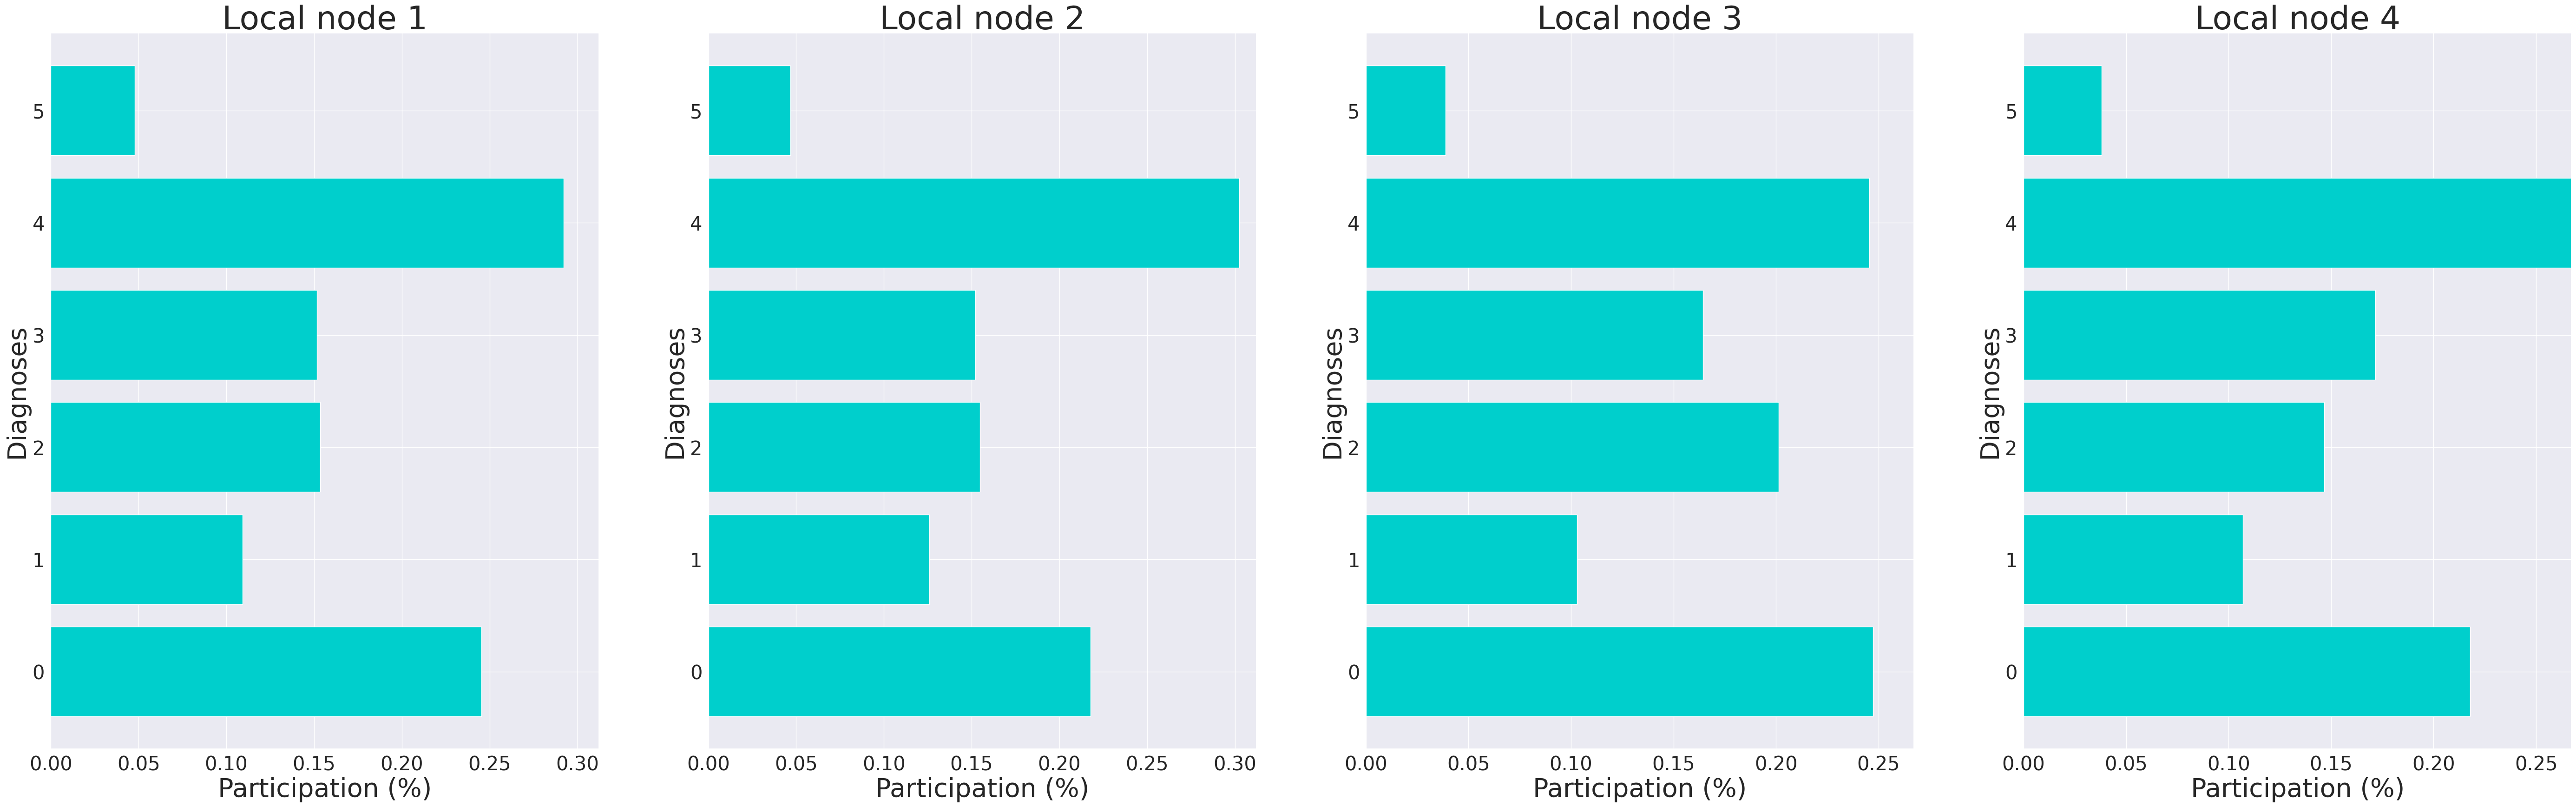

In [ ]:
## Check distributions of created clients
# Define dimensions for plot
f, axs = plt.subplots(1,num_local_nodes,figsize=(70,20))

# Initialize counter
cont = 0


max_xlab = 0.4 + 0.02
fl_append_labels = []

# Loop over the clients
for key, value in clients_glob.items():

  # Extract the labels
  labels_check = []
  for i in range(len(value)):
    val = value[i][1]
    labels_check.append(val)


  fl_append_labels = fl_append_labels + list(labels_check[:len(labels_check)-miss_class_per_node[cont]])

  labels_check = pd.DataFrame(labels_check,columns=["label"]).reset_index()


  # Get the number of diagnoses per diagnose
  group = labels_check.groupby(['label']).count().reset_index().sort_values(by=['label'], ascending = True)
  group['particip'] = group['index'].values / sum(group['index'].values)
  group.sort_values(by=['label'], ascending=False, inplace=True)

  print("Local node" + str(cont + 1) + " shape:",labels_check[:len(labels_check)-miss_class_per_node[cont]].shape)

  # Plot each client barplot
  max_group = max(group['particip'])
  max_xlab = np.min([max_xlab,max_group])
  plt.subplot(1, num_local_nodes, cont + 1)
  plt.barh(group.label, group['particip'],alpha = 1, color=colors[0])
  plt.xlabel('Participation (%)', fontsize=40)
  plt.ylabel('Diagnoses', fontsize=40)
  plt.title(key.replace("_"," "), fontsize=50)
  plt.xticks(fontsize=30)
  plt.yticks(fontsize=30)
  plt.xlim(left=0, right=max_xlab + 0.02)
  # Increase counter
  cont += 1

In [ ]:

# Define loss
loss_inic = SparseCategoricalCrossentropy()

# Define metric to check
metrics = SparseCategoricalAccuracy()

# Set optimizer
optimizer = Adam(learning_rate=0.001)

In [ ]:

# The `evaluate` function will be by Flower called after every round
def evaluate_DNN_CL(
    server_round: int,
    parameters: fl.common.NDArrays,
    config: Dict[str, fl.common.Scalar],
) -> Optional[Tuple[float, Dict[str, fl.common.Scalar]]]:
    net = DNN(len(feature_names), len(np.unique(labels)))
    net.set_weights(parameters) # Update model with the latest parameters
    loss, accuracy, precision, recall, f1score  = test_model(net, x_test_glob, np.array(y_test_glob_num))
    print(f"@@@@@@ Server-side evaluation loss {loss} / accuracy {accuracy} / f1score {f1score} @@@@@@")
    return loss, {"accuracy": accuracy,"precision": precision,"recall": recall,"f1score": f1score}

In [ ]:
# Define number of epochs per local node
epochs = 5

# Define number of communication rounds
comms_round = 5


# Define dunction to pass to each local node (client)
def client_fn(cid: str) -> fl.client.Client:
    # Define model
    model = DNN(len(feature_names), len(np.unique(labels)))

    # Set optimizer
    optimizer = Adam(learning_rate=0.001)

    # Compile model
    model.compile(optimizer=optimizer,loss=loss_inic,metrics=metrics)

    # Load data partition of each client ID (cid)
    x_train_cid = np.array(list_x_train[int(cid)],dtype=float)
    y_train_cid = np.array(list_y_train[int(cid)],dtype=float)

    # Define test data (taken from the centralized data to compare performance of CL and FL)
    x_test_cid = np.array(x_test_glob)
    y_test_cid = np.array(y_test_glob_num)

    # Create and return client
    return FlowerClient(model, x_train_cid, y_train_cid, x_test_cid, y_test_cid, epochs)

# Create Federated strategy
strategy=fl.server.strategy.FedAvg(
        fraction_fit=1.0,  # Sample 100% of available clients for training
        fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
        min_fit_clients=local_nodes_glob,  # Never sample less than 2 clients for training
        min_evaluate_clients=local_nodes_glob//2,  # Never sample less than 1 client for evaluation
        min_available_clients=local_nodes_glob,  # Wait until all clients are available
        evaluate_fn=evaluate_DNN_CL
)

start_time = time.time()
# Start simulation (training FL)
commun_metrics_history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=local_nodes_glob,
    config=fl.server.ServerConfig(num_rounds=comms_round),
    strategy=strategy,
)

# Get total training time
training_time = time.time() - start_time

# Unmask metrics
global_acc_test = retrieve_global_metrics(commun_metrics_history,"centralized","accuracy",True)

global_pre_test = retrieve_global_metrics(commun_metrics_history,"centralized","precision",True)

global_rec_test = retrieve_global_metrics(commun_metrics_history,"centralized","recall",True)

global_f1s_test = retrieve_global_metrics(commun_metrics_history,"centralized","f1score",True)

print("\n\nFINAL RESULTS: ===========================================================================================================================================================================================")
print('Test: commun_round: {} | global_acc: {:} | global_pre: {} | global_rec: {} | global_f1s: {}'.format(comms_round, global_acc_test, global_pre_test, global_rec_test, global_f1s_test))
print("Training time: %s seconds" % (training_time))

INFO flwr 2023-12-28 20:26:22,265 | app.py:178 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2023-12-28 20:26:29,247	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2023-12-28 20:26:32,620 | app.py:213 | Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 3992500224.0, 'memory': 7985000448.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 3992500224.0, 'memory': 7985000448.0}
INFO flwr 2023-12-28 20:26:32,629 | app.py:219 | Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO:flwr:Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO flwr 2023-12-28 20:

8/8 [==============================] - 0s 11ms/step


INFO flwr 2023-12-28 20:26:47,459 | server.py:94 | initial parameters (loss, other metrics): 2.003801, {'accuracy': 0.20948616600790515, 'precision': 0.45164317860282954, 'recall': 0.20948616600790515, 'f1score': 0.2414712899367631}
INFO:flwr:initial parameters (loss, other metrics): 2.003801, {'accuracy': 0.20948616600790515, 'precision': 0.45164317860282954, 'recall': 0.20948616600790515, 'f1score': 0.2414712899367631}
INFO flwr 2023-12-28 20:26:47,466 | server.py:104 | FL starting
INFO:flwr:FL starting
DEBUG flwr 2023-12-28 20:26:47,470 | server.py:222 | fit_round 1: strategy sampled 4 clients (out of 4)
DEBUG:flwr:fit_round 1: strategy sampled 4 clients (out of 4)


@@@@@@ Server-side evaluation loss 2.003801107406616 / accuracy 0.20948616600790515 / f1score 0.2414712899367631 @@@@@@
(DefaultActor pid=43612) Epoch 1/5
(DefaultActor pid=43612) 32/32 - 3s - loss: 1.9820 - sparse_categorical_accuracy: 0.2477 - val_loss: 1.9250 - val_sparse_categorical_accuracy: 0.2973 - 3s/epoch - 109ms/step
(DefaultActor pid=43611) Epoch 3/5 [repeated 5x across cluster]
(DefaultActor pid=43612) 32/32 - 1s - loss: 0.9540 - sparse_categorical_accuracy: 0.6680 - val_loss: 2.1479 - val_sparse_categorical_accuracy: 0.2973 - 1s/epoch - 45ms/step [repeated 8x across cluster]
(DefaultActor pid=43611) Epoch 1/5 [repeated 6x across cluster]
(DefaultActor pid=43612) 32/32 - 5s - loss: 1.9483 - sparse_categorical_accuracy: 0.2773 - val_loss: 1.9035 - val_sparse_categorical_accuracy: 0.2321 - 5s/epoch - 156ms/step [repeated 2x across cluster]
(DefaultActor pid=43611) Epoch 2/5 [repeated 2x across cluster]
(DefaultActor pid=43612) 32/32 - 2s - loss: 0.9320 - sparse_categorical_ac

DEBUG flwr 2023-12-28 20:27:12,092 | server.py:236 | fit_round 1 received 4 results and 0 failures
DEBUG:flwr:fit_round 1 received 4 results and 0 failures
WARNING flwr 2023-12-28 20:27:12,246 | fedavg.py:242 | No fit_metrics_aggregation_fn provided


8/8 [==============================] - 1s 10ms/step


INFO flwr 2023-12-28 20:27:16,331 | server.py:125 | fit progress: (1, 1.6749377, {'accuracy': 0.3241106719367589, 'precision': 0.521226193253455, 'recall': 0.3241106719367589, 'f1score': 0.3796104881094898}, 28.861385113001234)
INFO:flwr:fit progress: (1, 1.6749377, {'accuracy': 0.3241106719367589, 'precision': 0.521226193253455, 'recall': 0.3241106719367589, 'f1score': 0.3796104881094898}, 28.861385113001234)
DEBUG flwr 2023-12-28 20:27:16,337 | server.py:173 | evaluate_round 1: strategy sampled 2 clients (out of 4)
DEBUG:flwr:evaluate_round 1: strategy sampled 2 clients (out of 4)


@@@@@@ Server-side evaluation loss 1.6749377250671387 / accuracy 0.3241106719367589 / f1score 0.3796104881094898 @@@@@@


DEBUG flwr 2023-12-28 20:27:17,988 | server.py:187 | evaluate_round 1 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2023-12-28 20:27:17,996 | fedavg.py:273 | No evaluate_metrics_aggregation_fn provided
DEBUG flwr 2023-12-28 20:27:18,000 | server.py:222 | fit_round 2: strategy sampled 4 clients (out of 4)


(DefaultActor pid=43611) 8/8 - 0s - loss: 1.6749 - sparse_categorical_accuracy: 0.3241 - 487ms/epoch - 61ms/step
(DefaultActor pid=43611) 35/35 - 1s - loss: 0.9764 - sparse_categorical_accuracy: 0.6427 - val_loss: 2.1167 - val_sparse_categorical_accuracy: 0.3065 - 1s/epoch - 40ms/step [repeated 2x across cluster]


DEBUG:flwr:fit_round 2: strategy sampled 4 clients (out of 4)


(DefaultActor pid=43612) Epoch 1/5
(DefaultActor pid=43612) 8/8 - 0s - loss: 1.6749 - sparse_categorical_accuracy: 0.3241 - 429ms/epoch - 54ms/step
(DefaultActor pid=43612) 35/35 - 5s - loss: 1.6836 - sparse_categorical_accuracy: 0.3519 - val_loss: 1.8341 - val_sparse_categorical_accuracy: 0.3387 - 5s/epoch - 132ms/step
(DefaultActor pid=43611) 32/32 - 5s - loss: 1.7064 - sparse_categorical_accuracy: 0.3300 - val_loss: 1.9180 - val_sparse_categorical_accuracy: 0.3514 - 5s/epoch - 157ms/step
(DefaultActor pid=43611) Epoch 2/5 [repeated 3x across cluster]
(DefaultActor pid=43612) 35/35 - 2s - loss: 0.7290 - sparse_categorical_accuracy: 0.7408 - val_loss: 2.6032 - val_sparse_categorical_accuracy: 0.2581 - 2s/epoch - 44ms/step [repeated 7x across cluster]
(DefaultActor pid=43611) Epoch 5/5 [repeated 6x across cluster]
(DefaultActor pid=43612) 31/31 - 2s - loss: 1.4085 - sparse_categorical_accuracy: 0.4770 - val_loss: 2.0171 - val_sparse_categorical_accuracy: 0.2936 - 2s/epoch - 63ms/step [

DEBUG flwr 2023-12-28 20:27:42,555 | server.py:236 | fit_round 2 received 4 results and 0 failures
DEBUG:flwr:fit_round 2 received 4 results and 0 failures


8/8 [==============================] - 0s 6ms/step


INFO flwr 2023-12-28 20:27:45,328 | server.py:125 | fit progress: (2, 1.6424012, {'accuracy': 0.30434782608695654, 'precision': 0.34623799835447916, 'recall': 0.30434782608695654, 'f1score': 0.3226546820978951}, 57.85796799400123)
INFO:flwr:fit progress: (2, 1.6424012, {'accuracy': 0.30434782608695654, 'precision': 0.34623799835447916, 'recall': 0.30434782608695654, 'f1score': 0.3226546820978951}, 57.85796799400123)
DEBUG flwr 2023-12-28 20:27:45,334 | server.py:173 | evaluate_round 2: strategy sampled 2 clients (out of 4)
DEBUG:flwr:evaluate_round 2: strategy sampled 2 clients (out of 4)


@@@@@@ Server-side evaluation loss 1.6424012184143066 / accuracy 0.30434782608695654 / f1score 0.3226546820978951 @@@@@@


DEBUG flwr 2023-12-28 20:27:46,616 | server.py:187 | evaluate_round 2 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2023-12-28 20:27:46,624 | server.py:222 | fit_round 3: strategy sampled 4 clients (out of 4)
DEBUG:flwr:fit_round 3: strategy sampled 4 clients (out of 4)


(DefaultActor pid=43611) 8/8 - 1s - loss: 1.6424 - sparse_categorical_accuracy: 0.3043 - 549ms/epoch - 69ms/step
(DefaultActor pid=43611) 32/32 - 1s - loss: 0.7390 - sparse_categorical_accuracy: 0.7477 - val_loss: 2.7670 - val_sparse_categorical_accuracy: 0.2857 - 977ms/epoch - 31ms/step [repeated 2x across cluster]
(DefaultActor pid=43611) Epoch 1/5
(DefaultActor pid=43612) 8/8 - 0s - loss: 1.6424 - sparse_categorical_accuracy: 0.3043 - 499ms/epoch - 62ms/step
(DefaultActor pid=43612) 31/31 - 2s - loss: 1.0134 - sparse_categorical_accuracy: 0.6292 - val_loss: 2.5587 - val_sparse_categorical_accuracy: 0.2936 - 2s/epoch - 55ms/step [repeated 3x across cluster]
(DefaultActor pid=43611) Epoch 3/5 [repeated 5x across cluster]
(DefaultActor pid=43611) 35/35 - 3s - loss: 0.6156 - sparse_categorical_accuracy: 0.7813 - val_loss: 2.8015 - val_sparse_categorical_accuracy: 0.2742 - 3s/epoch - 76ms/step [repeated 5x across cluster]
(DefaultActor pid=43611) Epoch 5/5 [repeated 4x across cluster]
(D

DEBUG flwr 2023-12-28 20:28:09,280 | server.py:236 | fit_round 3 received 4 results and 0 failures
DEBUG:flwr:fit_round 3 received 4 results and 0 failures


(DefaultActor pid=43611) 32/32 - 1s - loss: 0.6010 - sparse_categorical_accuracy: 0.8094 - val_loss: 3.5135 - val_sparse_categorical_accuracy: 0.2342 - 835ms/epoch - 26ms/step [repeated 8x across cluster]
(DefaultActor pid=43611) Epoch 5/5 [repeated 6x across cluster]
8/8 [==============================] - 0s 11ms/step


INFO flwr 2023-12-28 20:28:15,197 | server.py:125 | fit progress: (3, 1.7410583, {'accuracy': 0.30434782608695654, 'precision': 0.30070829234925767, 'recall': 0.30434782608695654, 'f1score': 0.3008489020926457}, 87.72679905199948)
INFO:flwr:fit progress: (3, 1.7410583, {'accuracy': 0.30434782608695654, 'precision': 0.30070829234925767, 'recall': 0.30434782608695654, 'f1score': 0.3008489020926457}, 87.72679905199948)
DEBUG flwr 2023-12-28 20:28:15,207 | server.py:173 | evaluate_round 3: strategy sampled 2 clients (out of 4)
DEBUG:flwr:evaluate_round 3: strategy sampled 2 clients (out of 4)


@@@@@@ Server-side evaluation loss 1.741058349609375 / accuracy 0.30434782608695654 / f1score 0.3008489020926457 @@@@@@
(DefaultActor pid=43611) 8/8 - 0s - loss: 1.7411 - sparse_categorical_accuracy: 0.3043 - 455ms/epoch - 57ms/step


DEBUG flwr 2023-12-28 20:28:17,531 | server.py:187 | evaluate_round 3 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 3 received 2 results and 0 failures
DEBUG flwr 2023-12-28 20:28:17,534 | server.py:222 | fit_round 4: strategy sampled 4 clients (out of 4)
DEBUG:flwr:fit_round 4: strategy sampled 4 clients (out of 4)


(DefaultActor pid=43612) Epoch 1/5
(DefaultActor pid=43612) 35/35 - 3s - loss: 1.2361 - sparse_categorical_accuracy: 0.5401 - val_loss: 2.1077 - val_sparse_categorical_accuracy: 0.2419 - 3s/epoch - 88ms/step
(DefaultActor pid=43612) 8/8 - 1s - loss: 1.7411 - sparse_categorical_accuracy: 0.3043 - 1s/epoch - 129ms/step
(DefaultActor pid=43611) Epoch 3/5 [repeated 5x across cluster]
(DefaultActor pid=43611) 31/31 - 1s - loss: 0.4293 - sparse_categorical_accuracy: 0.8713 - val_loss: 3.8975 - val_sparse_categorical_accuracy: 0.2110 - 1s/epoch - 44ms/step [repeated 7x across cluster]
(DefaultActor pid=43611) Epoch 1/5 [repeated 6x across cluster]
(DefaultActor pid=43612) 32/32 - 6s - loss: 1.3130 - sparse_categorical_accuracy: 0.5155 - val_loss: 2.2115 - val_sparse_categorical_accuracy: 0.2703 - 6s/epoch - 173ms/step [repeated 3x across cluster]
(DefaultActor pid=43611) Epoch 2/5 [repeated 2x across cluster]
(DefaultActor pid=43611) 32/32 - 1s - loss: 0.5125 - sparse_categorical_accuracy: 0.

DEBUG flwr 2023-12-28 20:28:40,619 | server.py:236 | fit_round 4 received 4 results and 0 failures
DEBUG:flwr:fit_round 4 received 4 results and 0 failures


8/8 [==============================] - 0s 6ms/step


INFO flwr 2023-12-28 20:28:43,390 | server.py:125 | fit progress: (4, 2.0381308, {'accuracy': 0.2845849802371542, 'precision': 0.27263023418672, 'recall': 0.2845849802371542, 'f1score': 0.27673349145400555}, 115.92032137000024)
INFO:flwr:fit progress: (4, 2.0381308, {'accuracy': 0.2845849802371542, 'precision': 0.27263023418672, 'recall': 0.2845849802371542, 'f1score': 0.27673349145400555}, 115.92032137000024)
DEBUG flwr 2023-12-28 20:28:43,394 | server.py:173 | evaluate_round 4: strategy sampled 2 clients (out of 4)
DEBUG:flwr:evaluate_round 4: strategy sampled 2 clients (out of 4)


@@@@@@ Server-side evaluation loss 2.038130760192871 / accuracy 0.2845849802371542 / f1score 0.27673349145400555 @@@@@@


DEBUG flwr 2023-12-28 20:28:44,295 | server.py:187 | evaluate_round 4 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 4 received 2 results and 0 failures
DEBUG flwr 2023-12-28 20:28:44,298 | server.py:222 | fit_round 5: strategy sampled 4 clients (out of 4)
DEBUG:flwr:fit_round 5: strategy sampled 4 clients (out of 4)


(DefaultActor pid=43611) 8/8 - 0s - loss: 2.0381 - sparse_categorical_accuracy: 0.2846 - 298ms/epoch - 37ms/step
(DefaultActor pid=43611) 32/32 - 1s - loss: 0.4534 - sparse_categorical_accuracy: 0.8659 - val_loss: 3.5623 - val_sparse_categorical_accuracy: 0.2589 - 1s/epoch - 35ms/step [repeated 2x across cluster]
(DefaultActor pid=43612) Epoch 2/5 [repeated 3x across cluster]
(DefaultActor pid=43612) 8/8 - 0s - loss: 2.0381 - sparse_categorical_accuracy: 0.2846 - 281ms/epoch - 35ms/step
(DefaultActor pid=43611) 31/31 - 5s - loss: 1.0567 - sparse_categorical_accuracy: 0.6170 - val_loss: 2.7186 - val_sparse_categorical_accuracy: 0.2477 - 5s/epoch - 158ms/step [repeated 2x across cluster]
(DefaultActor pid=43612) Epoch 5/5 [repeated 6x across cluster]
(DefaultActor pid=43612) 32/32 - 1s - loss: 0.3132 - sparse_categorical_accuracy: 0.8989 - val_loss: 3.9144 - val_sparse_categorical_accuracy: 0.2589 - 1s/epoch - 44ms/step [repeated 5x across cluster]
(DefaultActor pid=43612) Epoch 2/5 [rep

DEBUG flwr 2023-12-28 20:29:08,575 | server.py:236 | fit_round 5 received 4 results and 0 failures
DEBUG:flwr:fit_round 5 received 4 results and 0 failures


8/8 [==============================] - 0s 6ms/step


INFO flwr 2023-12-28 20:29:12,608 | server.py:125 | fit progress: (5, 2.1957026, {'accuracy': 0.2648221343873518, 'precision': 0.2577230608596987, 'recall': 0.2648221343873518, 'f1score': 0.2556859481845742}, 145.1382314370003)
INFO:flwr:fit progress: (5, 2.1957026, {'accuracy': 0.2648221343873518, 'precision': 0.2577230608596987, 'recall': 0.2648221343873518, 'f1score': 0.2556859481845742}, 145.1382314370003)
DEBUG flwr 2023-12-28 20:29:12,617 | server.py:173 | evaluate_round 5: strategy sampled 2 clients (out of 4)
DEBUG:flwr:evaluate_round 5: strategy sampled 2 clients (out of 4)


@@@@@@ Server-side evaluation loss 2.19570255279541 / accuracy 0.2648221343873518 / f1score 0.2556859481845742 @@@@@@


DEBUG flwr 2023-12-28 20:29:13,508 | server.py:187 | evaluate_round 5 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 5 received 2 results and 0 failures
INFO flwr 2023-12-28 20:29:13,512 | server.py:153 | FL finished in 146.0423053859995
INFO:flwr:FL finished in 146.0423053859995
INFO flwr 2023-12-28 20:29:13,514 | app.py:226 | app_fit: losses_distributed [(1, 1.6749377250671387), (2, 1.642401099205017), (3, 1.741058349609375), (4, 2.038130760192871), (5, 2.1957027912139893)]
INFO:flwr:app_fit: losses_distributed [(1, 1.6749377250671387), (2, 1.642401099205017), (3, 1.741058349609375), (4, 2.038130760192871), (5, 2.1957027912139893)]
INFO flwr 2023-12-28 20:29:13,517 | app.py:227 | app_fit: metrics_distributed_fit {}
INFO:flwr:app_fit: metrics_distributed_fit {}
INFO flwr 2023-12-28 20:29:13,519 | app.py:228 | app_fit: metrics_distributed {}
INFO:flwr:app_fit: metrics_distributed {}
INFO flwr 2023-12-28 20:29:13,523 | app.py:229 | app_fit: losses_centralized [(0, 2.003801)

(DefaultActor pid=43611) 8/8 - 0s - loss: 2.1957 - sparse_categorical_accuracy: 0.2648 - 292ms/epoch - 36ms/step
(DefaultActor pid=43611) 35/35 - 2s - loss: 0.4754 - sparse_categorical_accuracy: 0.8668 - val_loss: 4.1872 - val_sparse_categorical_accuracy: 0.2903 - 2s/epoch - 53ms/step [repeated 2x across cluster]


FINAL RESULTS: ===========================================================================================================================================================================================
Test: commun_round: 5 | global_acc: 0.3241106719367589 | global_pre: 0.521226193253455 | global_rec: 0.3241106719367589 | global_f1s: 0.3796104881094898
Training time: 171.27369904518127 seconds


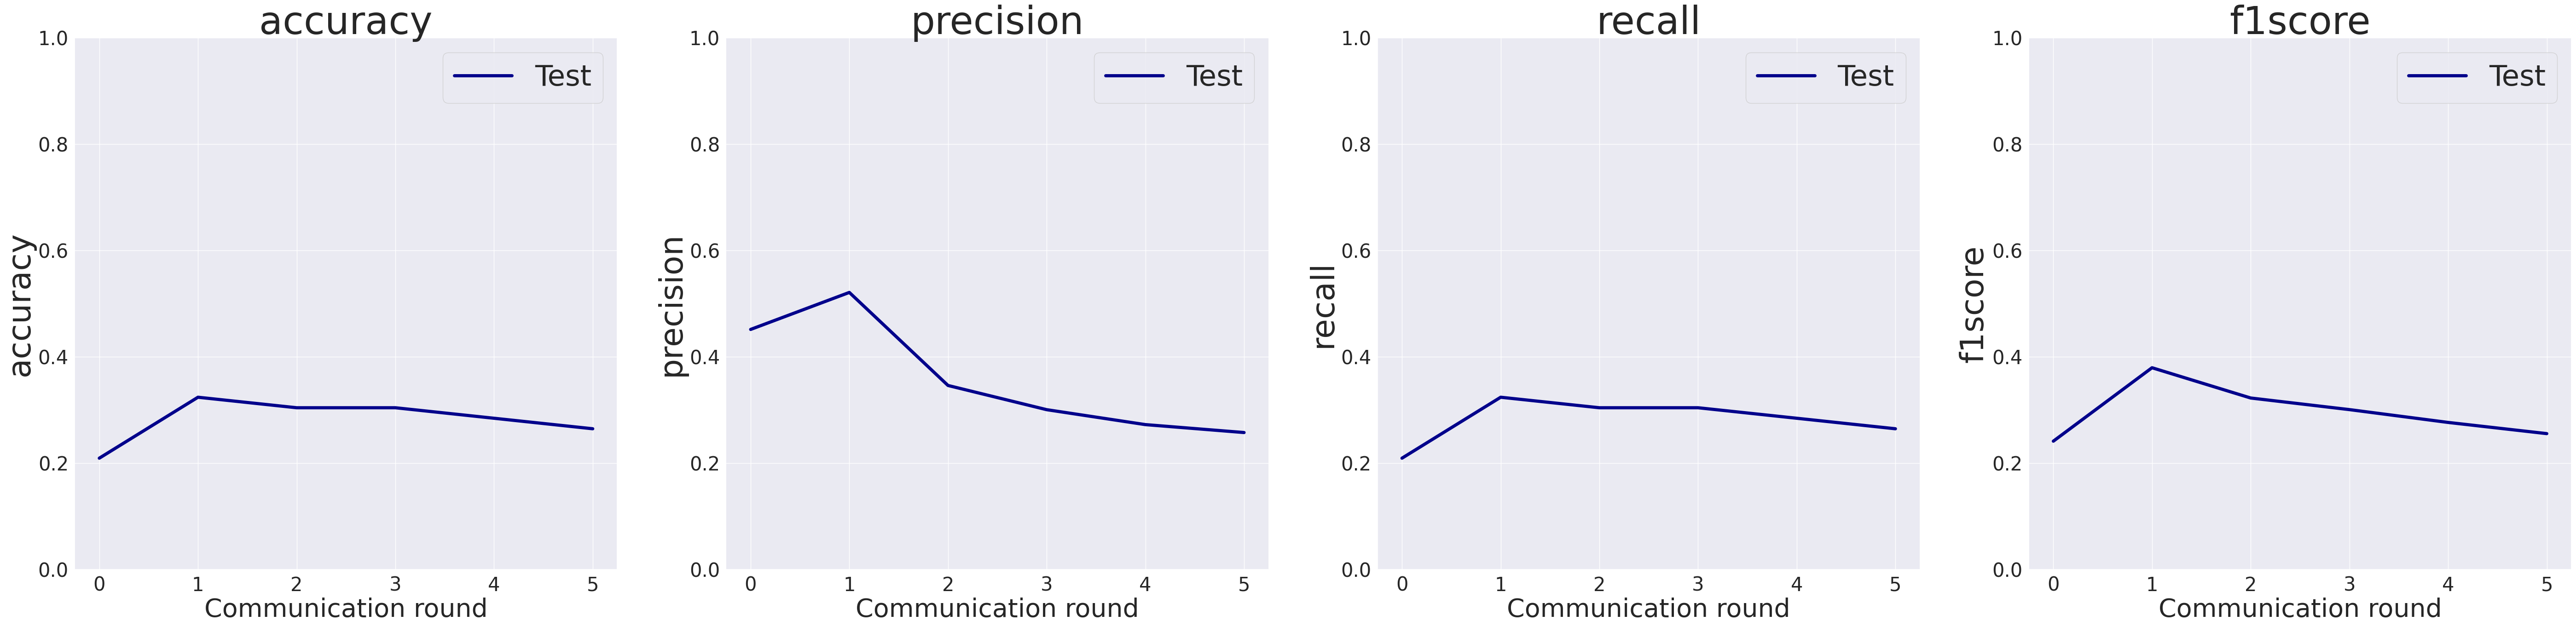

In [ ]:

# Define metrics to plot
metrics_show = ["accuracy","precision","recall","f1score"]

# Define dimensions for plot
f, axs = plt.subplots(1,len(metrics_show),figsize=(70,15))

# Loop over the communication round history and metrics
for i in range(len(metrics_show)):
  plt.subplot(1, len(metrics_show), i + 1)
  plot_metric_from_history(commun_metrics_history,"any","centralized",metrics_show[i])

In [ ]:
# Define metrics in a dataframe
metrics_DNN = {'metric_name':  ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
           'set_used': ['Test', 'Test', 'Test', 'Test'],
           'metric_value': [ global_acc_test , global_pre_test , global_rec_test , global_f1s_test]
        }

metrics_DNN = pd.DataFrame(metrics_DNN, columns = ['metric_name', 'set_used','metric_value'])

# Plot metrics
fig = go.Figure(data=[
    go.Bar(name='Test', x=metrics_DNN[metrics_DNN['set_used']=="Test"]['metric_name'], y=metrics_DNN[metrics_DNN['set_used']=="Test"]['metric_value'], marker_color=colors[4])
], layout_yaxis_range=[0,1])
# Change the bar mode
fig.update_layout(barmode='group', autosize=False,
    width=700,
    height=500, xaxis_title="Metric",
    yaxis_title="Metric value",
    legend_title="Dataset", font=dict(size=20)
    )


fig.show()